# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [2]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib as mpl
import matplotlib.gridspec as gridspec

#Set width of plot borders globally
mpl.rcParams['axes.linewidth'] = 0.1

%matplotlib notebook

#Generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.randn(10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)
x4 = np.random.uniform(0,5, 10000)

<IPython.core.display.Javascript object>


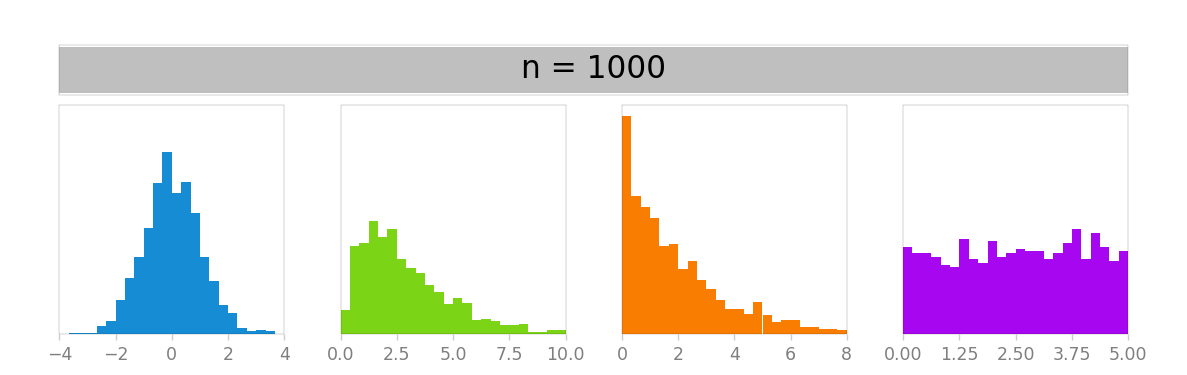

C:\Users\Gracy\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


In [3]:
#Initialize bins
bin_count = 24
spans = [[-4, 4], [0, 10], [0, 8], [0, 5]]
widths = [float(spans[i][1] - spans[i][0]) / bin_count for i in range(4)]
bins = [np.arange(spans[i][0], spans[i][1] +  widths[i], widths[i]) for i in range(4)]

x = [x1, x2, x3, x4]

#Colors of histograms
colors = ['#168cd4', '#7cd416', '#f97d00', '#a707f0']

def update(n_cur):
    #Stop animation at n samples
    if n_cur == n:
        a.event_source.stop()
        
    #Set histograms axes
    [axes[i].clear() for i in range(4)]
    [axes[i].yaxis.get_majorticklabels()[j].set_visible(False) 
         for i in range(4) for j in range(len(axes[i].yaxis.get_majorticklabels()))]
    [axes[i].yaxis.get_majorticklines()[j].set_visible(False) 
         for i in range(4) for j in range(len(axes[i].yaxis.get_majorticklines()))]
    [axes[i].xaxis.get_majorticklines()[j].set_alpha(.2) 
         for i in range(4) for j in range(len(axes[i].xaxis.get_majorticklines()))]
    [axes[i].xaxis.get_majorticklabels()[j].set_alpha(.5) 
         for i in range(4) for j in range(len(axes[i].xaxis.get_majorticklabels()))]
    [axes[i].set_xlim(*spans[i]) for i in range(4)]
    [axes[i].set_xticks(bins[i][::6]) for i in range(4)]

    #Plot histograms
    [axes[i].hist(x[i][:n_cur], bins = bins[i], color = colors[i], normed = True) for i in range(4)]
    
    #Set sample progress bar
    plt.subplot(gspec[0, :])
    ax = plt.gca()
    ax = plt.gca()
    ax.clear()
    plt.barh(bottom = 0, width = n_cur, color = 'grey', alpha = 0.5)
    ax.set_xticks(np.arange(0, 1100, 100))
    ax.tick_params(axis='x', which='major', pad=1)
    ax.xaxis.set_ticks_position('top')
    ax.text(500, 0, 'n = {}'.format(n_cur), verticalalignment='center', horizontalalignment='center', fontsize = 18)
    
    for spine in ax.spines.values():
        spine.set_alpha(1)
    
    
    [ax.xaxis.get_majorticklabels()[j].set_visible(False) 
         for j in range(len(ax.xaxis.get_majorticklabels()))]
    [ax.xaxis.get_majorticklines()[j].set_visible(False) 
         for j in range(len(ax.xaxis.get_majorticklines()))]
    
    
    [ax.yaxis.get_majorticklabels()[j].set_visible(False) 
         for j in range(len(ax.yaxis.get_majorticklabels()))]
    [ax.yaxis.get_majorticklines()[j].set_visible(False) 
         for j in range(len(ax.yaxis.get_majorticklines()))]
    ax.set_xlim(0, n)
    

#Create and adjust figure
n = 1000
fig = plt.figure(figsize = (9.5, 3))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace = 0.25)

#Create gridspec and set shared y axis for histograms' axes
gspec = gridspec.GridSpec(5, 4)
axes0 = plt.subplot(gspec[1:, 0])
axes = [plt.subplot(gspec[1:, i], sharey =  axes0) for i in range(4)]

#Initialize plots with no sample
update(0)

#Run animation
a = animation.FuncAnimation(fig, update, interval = 1500,
                            frames = list(range(0, 11, 1)) + [15, 20, 30, 50, 100, 200, 300, 500, 750, 1000])